# StarGANs : ExpressionInverter and StyleInVerter with Unsupervised learning implement



# 1 Author

**Student Name**:  Zijian Hu \
**Student ID**:  210985779


# 2 Problem formulation
The machine learning challenge I aim to address involves the training of an unsupervised model, specifically StarGANs, utilizing the Genki4k dataset. The primary goal is to generate facial expression inversion images. What makes this task particularly intriguing is the complexity and nuance involved in accurately capturing and altering facial expressions, which are inherently intricate and subtle. Utilizing StarGANs, a type of Generative Adversarial Network (GAN), allows for the manipulation of facial features in a sophisticated and nuanced manner, enabling the transformation of expressions (e.g., from smiling to non-smiling) in a realistic way.

Moreover, the project involves an additional layer of evaluation using a smile classification model that I have previously trained. This model will serve as a benchmark to assess the quality and accuracy of the generated images, providing valuable insights into the effectiveness and reliability of the StarGANs model in handling complex facial transformations. This approach not only tests the model's proficiency in understanding and modifying intricate facial features but also addresses the challenging aspect of evaluating the quality of generated images, which is crucial in the fields of image processing and pattern recognition. The convergence of these technologies and methodologies presents a unique and compelling problem in the realm of machine learning.

# 3 Machine Learning pipeline

**Input:** The pipeline starts with the input data, which in this case is the Genki4k dataset. This dataset comprises a collection of images with various facial expressions.

**Data Preprocessing:** At this stage, the raw data undergoes cleaning and formatting to make it suitable for processing by the model. This may include steps like resizing images, normalization, and data augmentation.

**Feature Extraction:** During this phase, useful features are extracted from the processed data. For image data, this might involve features related to color, texture, shape, etc.

**Model Training (StarGANs):** The preprocessed data is used to train the StarGANs model. This unsupervised model will learn to generate images with inverted facial expressions, such as converting a smiling face to a non-smiling one.

**Image Generation:** The trained StarGANs model is used to generate new images with inverted expressions.

**Evaluation:** The generated images are evaluated using a smile classification model that you have previously trained. This model will assess the quality of the images produced by StarGANs, particularly in terms of the accuracy of the expressions.

**Output:** The final output is the expression-inverted images generated and evaluated by the StarGANs.

This pipeline covers the entire process from raw data input to the final image output, including key stages like data preprocessing, feature extraction, model training, image generation, and evaluation. The output of each stage becomes the input for the next, ensuring a smooth flow of data throughout the pipeline.

## 4. Transformation Stage: Feature Extraction with Wing

**Transformation Stage**: Advanced Feature Extraction with Wing

- **Input:** 
  - The input to this stage is preprocessed images from the Genki4k dataset, which have been resized, normalized, and possibly augmented.

- **Feature Extraction Process with Wing:**
  - The `Wing` module, integrated with the Face Alignment Network (FAN), is employed for advanced facial keypoint detection.
  - This process involves accurately identifying facial landmarks crucial for expression recognition and alteration. 
  - Key points such as the corners of the mouth, the position of the eyebrows, and the shape of the eyes are detected.
  - The `Wing` module's precision in detecting these points is essential for capturing the subtle nuances in facial expressions.

- **Output:**
  - The output is a detailed set of facial keypoints, representing the critical aspects of facial expressions.
  - These keypoints serve as feature vectors that the StarGAN v2 model uses for learning and transforming facial expressions.

**Reason for Choosing Wing for This Transformation Stage:**

- **Precision in Facial Feature Detection:**
  - The `Wing` module's ability to detect fine-grained facial keypoints is crucial for models dealing with facial expressions.
  - It ensures that the subtle variations in facial muscles, which are key to expression recognition and alteration, are accurately captured.

- **Enhanced Model Performance:**
  - By focusing on essential facial features, the `Wing` module allows the model to concentrate on the most impactful aspects of facial expressions.
  - This leads to more efficient and effective generation of expression-altered images.

- **Improved Learning Outcomes:**
  - The detailed keypoints provided by the `Wing` module simplify the learning process for the StarGAN v2 model.
  - With focused and precise data, the model can achieve better learning accuracy, avoiding the need to process irrelevant information.


For a deeper dive into the code, explore the `wing.py` file in the repository: [core/wing.py]

## 5 StarGAN  Model Overview

The [StarGAN v2](https://github.com/clovaai/stargan-v2) repository implements a sophisticated machine learning model for image-to-image translation and style transfer. Key components of the model include:

### **1. Residual Blocks (ResBlk)**
- Fundamental building blocks in the architecture.
- Comprise convolutional layers, optional normalization (`InstanceNorm2d`), and activation functions (`LeakyReLU`).
- Support down-sampling and learned shortcut connections.
- **Purpose:** Enhance the model's ability to capture complex features at various scales.

### **2. Adaptive Instance Normalization (AdaIN)**
- Crucial for style transfer tasks.
- Adjusts the feature maps to match the mean and variance of the style image's feature maps.
- **Purpose:** Enable dynamic style application.

### **3. AdainResBlk**
- Combines `ResBlk` and `AdaIN`.
- Supports up-sampling, used in the decoder part of the generator.
- **Purpose:** Perform style transfer at different network levels.

### **4. High-Pass Filter (HighPass)**
- Used for high-pass filtering.
- **Purpose:** Capture high-frequency components like textures and edges, important in style transfer.

### **5. Generator**
- Architecture includes encoding, bottleneck, and decoding phases.
- Utilizes the components mentioned above.
- **Purpose:** Generate images based on given style and content inputs.

### **6. Mapping Network**
- Maps latent vectors to style vectors.
- Series of fully connected layers.
- **Purpose:** Generate diverse styles from latent space representations.

### **7. Style Encoder**
- Encodes images into style vectors.
- Uses ResBlk for down-sampling and fully connected layers for style vector generation.
- **Purpose:** Encode the style information of images.

### **8. Discriminator**
- Distinguishes between real and fake images.
- Classifies the domain (style) of the image.
- Consists of down-sampling blocks and convolutional layers.
- **Purpose:** Ensure the realism and correctness of the generated images.

The choice of these components is driven by the need for a **flexible and powerful model** capable of performing high-quality image-to-image translation and style transfer. The use of residual blocks and adaptive normalization techniques allows the model to effectively learn and transfer styles between images.

For a deeper dive into the code, explore the `model.py` file in the repository: [core/model.py]

### 6. Methodology in the StarGAN v2 Project

In the project, the training and validation of models involve specialized loss functions, namely G-loss (Generator loss) and D-loss (Discriminator loss), which are applied in both latent and reference (ref) modes. Here's an overview of their roles and applications:

#### G-Loss (Generator Loss)
- **Latent Mode:**
  - In latent mode, G-loss is computed using a combination of adversarial loss, style reconstruction loss, diversity sensitive loss, and cycle-consistency loss.
  - **Adversarial Loss:** Ensures that the generated images are indistinguishable from real images by the discriminator.
  - **Style Reconstruction Loss:** Ensures that the generated image matches the target style.
  - **Diversity Sensitive Loss:** Encourages the generator to produce diverse outputs given different style codes.
  - **Cycle-Consistency Loss:** Ensures that a generated image, when re-encoded, can reconstruct the original image.

- **Reference Mode:**
  - In reference mode, G-loss includes similar components as in latent mode but is computed based on reference images rather than latent style codes.
  - This mode ensures that the generator can effectively transfer styles from reference images to the source images.

#### D-Loss (Discriminator Loss)
- **Latent Mode:**
  - In latent mode, D-loss includes real loss, fake loss, and regularization loss.
  - **Real Loss:** Penalizes the discriminator if it fails to recognize real images.
  - **Fake Loss:** Penalizes the discriminator if it incorrectly labels generated images as real.
  - **Regularization Loss (R1 Regularization):** Stabilizes the training of the discriminator.

- **Reference Mode:**
  - In reference mode, D-loss is computed similarly to latent mode but based on reference images.
  - This mode ensures that the discriminator can distinguish between real and fake images in the context of specific reference styles.

These loss functions are crucial for training the StarGAN v2 model effectively. They ensure that the model not only generates high-quality and diverse images but also maintains consistency and realism relative to the input styles, whether they are derived from latent codes or reference images.

For more detailed insights into the code and methodology, you can explore the `solver.py` file in the repository: [core/solver.py]




# 7. Dataset
The StarGAN v2 model uses datasets based on GENGKI4K for training and validation.
The datasets consist of high-quality images of human facess.
And split it into a new Dataset like this :
- **Preprocessing**:
Images are resized and normalized before being fed into the model.
Data augmentation techniques like random cropping and flipping are also applied.
And datasets in train and test are devided into 4 parts. 
- **Visualization**:
The dataset includes a wide variety of images, allowing the model to learn and generate diverse styles.
Visualizations of the dataset typically show the range of styles and qualities present in the images, which the model aims to capture and reproduce.
For more detailed insights into the code and methodology, you can explore the solver.py and data_loader.py files in the repository: core/solver.py and core/data_loader.py.

/tmp/ipykernel_5834/1288729077.py:48: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(img_size, Image.ANTIALIAS)


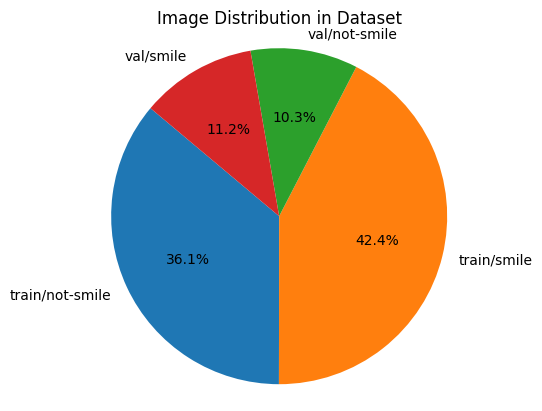

In [1]:
import os
import shutil
import random
from PIL import Image

def process_genki4k(dataset_dir, labels_file, output_dir, train_ratio=0.9, img_size=(128, 128)):
    """
    Process the GENKI4K dataset, dividing images into 'smile' and 'not-smile'
    categories, resizing them to 128x128 pixels, and splitting into training and validation sets.

    :param dataset_dir: Directory where the GENKI4K images are stored.
    :param labels_file: Path to the labels.txt file.
    :param output_dir: Directory where the processed dataset will be stored.
    :param train_ratio: Ratio of images to be used in the training set.
    :param img_size: New size of the images (width, height).
    """
    # Create necessary directories
    for set_type in ['train', 'val']:
        for category in ['smile', 'not-smile']:
            os.makedirs(os.path.join(output_dir, set_type, category), exist_ok=True)

    # Read labels
    with open(labels_file, 'r') as file:
        lines = file.readlines()

    # Create a list of (image_index, label) tuples
    labels = [(index, int(line.strip().split()[0])) for index, line in enumerate(lines, start=1)]

    # Shuffle labels to ensure random distribution
    random.shuffle(labels)

    # Split data into training and validation sets
    num_train = int(train_ratio * len(labels))
    train_labels = labels[:num_train]
    val_labels = labels[num_train:]

    # Helper function to process each set
    def process_set(set_labels, set_type):
        for img_index, label in set_labels:
            img_name = f"file{img_index:04d}.jpg"  # Assuming image names are in this format
            # Determine category and destination directory
            category = 'smile' if label == 1 else 'not-smile'
            dest_dir = os.path.join(output_dir, set_type, category)

            # Process and save the image
            img_path = os.path.join(dataset_dir, img_name)
            with Image.open(img_path) as img:
                img_resized = img.resize(img_size, Image.ANTIALIAS)
                img_resized.save(os.path.join(dest_dir, img_name))

    # Process training and validation sets
    process_set(train_labels, 'train')
    process_set(val_labels, 'val')

process_genki4k('Data/genki4k/files', 'Data/genki4k/labels.txt', 'Data/genkik-pro')

import os
import matplotlib.pyplot as plt

def count_images_in_folders(root_dir):
    """
    Count the number of images in each subfolder of the given root directory.

    :param root_dir: Root directory containing subfolders.
    :return: Dictionary with folder names as keys and image counts as values.
    """
    counts = {}
    for set_type in os.listdir(root_dir):
        set_path = os.path.join(root_dir, set_type)
        if os.path.isdir(set_path):
            for category in os.listdir(set_path):
                category_path = os.path.join(set_path, category)
                if os.path.isdir(category_path):
                    key = f"{set_type}/{category}"
                    counts[key] = len(os.listdir(category_path))
    return counts

def plot_image_distribution(counts):
    """
    Plot a pie chart showing the distribution of images.

    :param counts: Dictionary with folder names as keys and image counts as values.
    """
    labels = counts.keys()
    sizes = counts.values()

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.title('Image Distribution in Dataset')
    plt.show()

# Directory where the processed dataset is stored
output_dir = 'Data/genkik-pro'

# Count images and plot distribution
image_counts = count_images_in_folders(output_dir)
plot_image_distribution(image_counts)


# 8 Results


In [ ]:
## Trainning

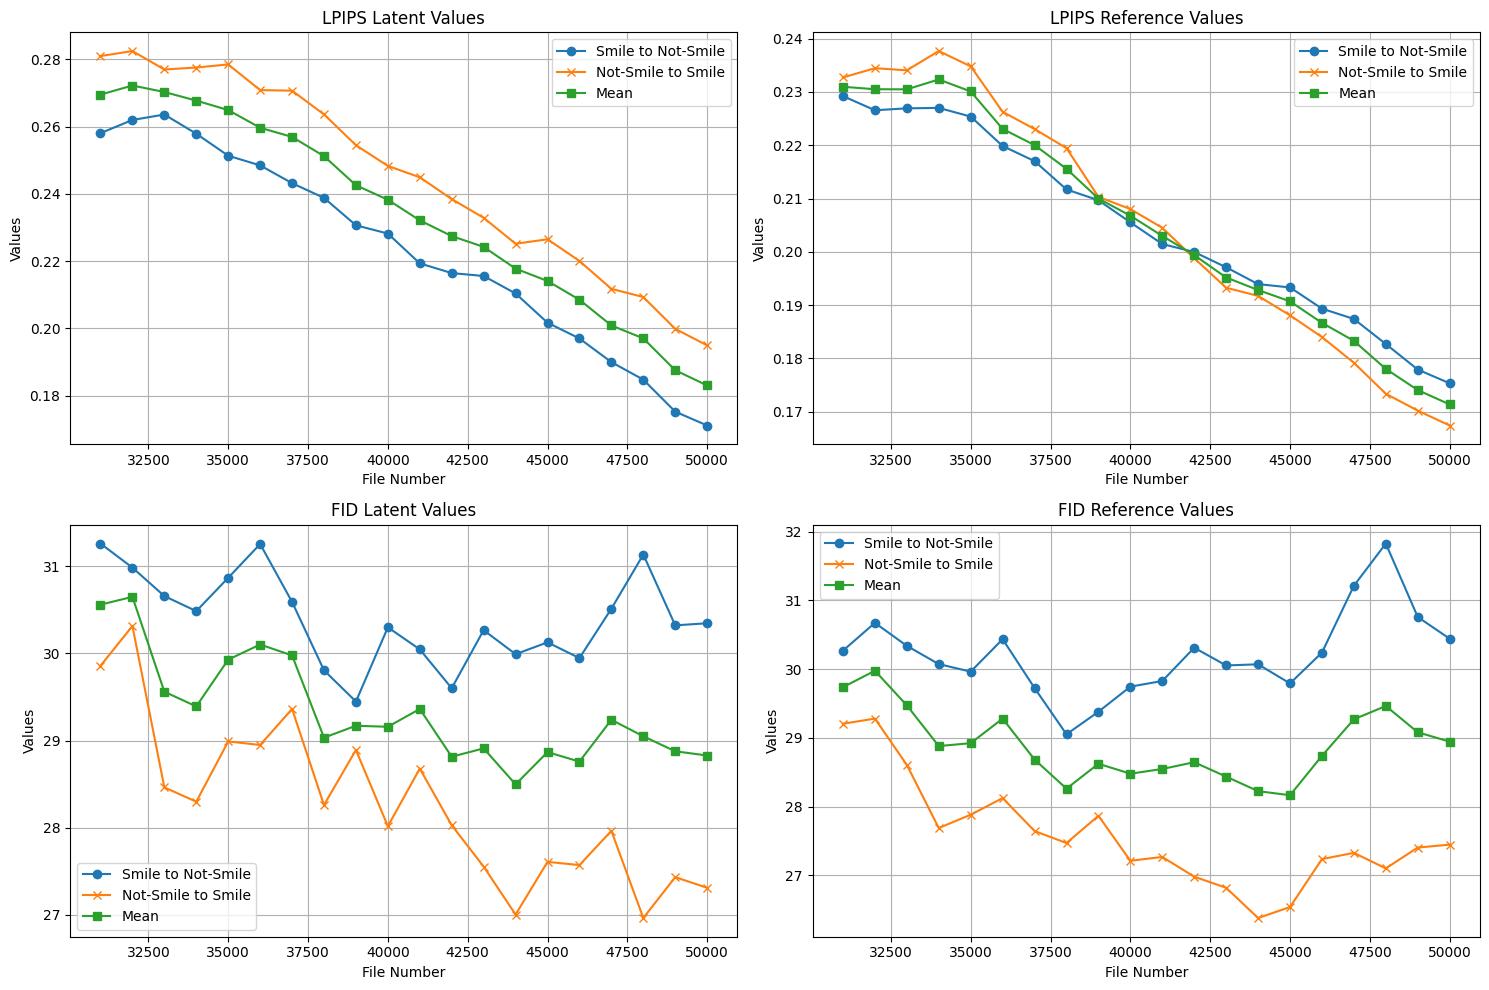

In [3]:
import matplotlib.pyplot as plt
import json
import os
from collections import defaultdict

# Define the path where the files are located
path = 'expr/eval'

# Data structures to hold the extracted values
# Using defaultdict to handle both LPIPS and FID data separately
data_values = defaultdict(lambda: defaultdict(list))

# Process the files and extract data
for filename in sorted(os.listdir(path)):
    # Determine the type of the file and the corresponding metric
    if filename.startswith('LPIPS') and 'latent' in filename:
        metric_prefix = 'LPIPS_latent'
    elif filename.startswith('LPIPS') and 'reference' in filename:
        metric_prefix = 'LPIPS_reference'
    elif filename.startswith('FID') and 'latent' in filename:
        metric_prefix = 'FID_latent'
    elif filename.startswith('FID') and 'reference' in filename:
        metric_prefix = 'FID_reference'
    else:
        continue  # If the file does not match the pattern, skip it
    
    # Extract file number
    file_number = int(filename.split('_')[1])
    with open(os.path.join(path, filename), 'r') as file:
        data = json.load(file)
        for key in data.keys():
            # Use the last part of the key to differentiate between smile2not-smile, not-smile2smile, and mean
            measurement = key.split('/')[-1]
            data_values[metric_prefix][measurement].append((file_number, data[key]))

# Sort the extracted values by file number for each measurement
for metric in data_values:
    for measurement in data_values[metric]:
        data_values[metric][measurement].sort()

# Create the plot with subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Function to plot each metric's data
def plot_metric_data(ax, metric, title):
    ax.plot(*zip(*data_values[metric]['smile2not-smile']), label='Smile to Not-Smile', marker='o')
    ax.plot(*zip(*data_values[metric]['not-smile2smile']), label='Not-Smile to Smile', marker='x')
    ax.plot(*zip(*data_values[metric]['mean']), label='Mean', marker='s')
    ax.set_title(title)
    ax.set_xlabel('File Number')
    ax.set_ylabel('Values')
    ax.legend()
    ax.grid(True)

# Plotting each metric in its respective subplot
plot_metric_data(axs[0, 0], 'LPIPS_latent', 'LPIPS Latent Values')
plot_metric_data(axs[0, 1], 'LPIPS_reference', 'LPIPS Reference Values')
plot_metric_data(axs[1, 0], 'FID_latent', 'FID Latent Values')
plot_metric_data(axs[1, 1], 'FID_reference', 'FID Reference Values')

plt.tight_layout()
plt.show()


## Test the images(not-smile2smile) generated by the model using Model I

3730
Test Accuracy: 80.24%


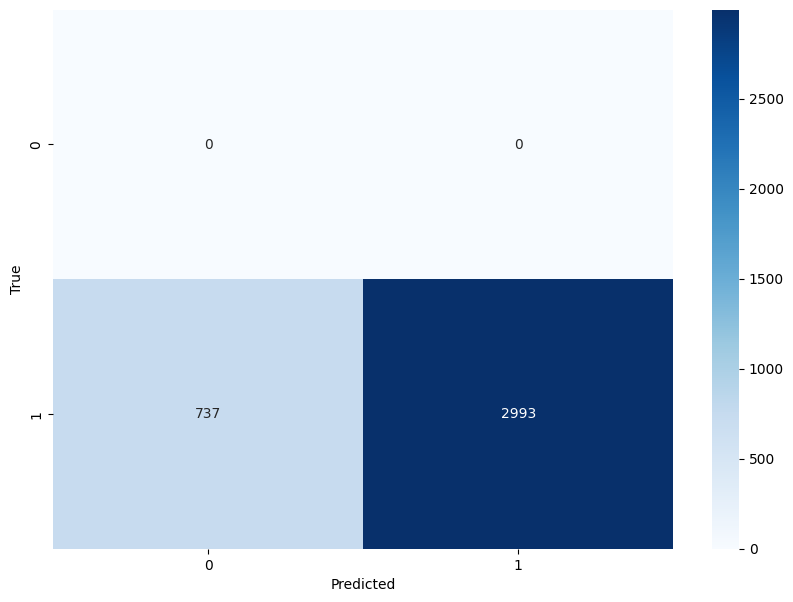

In [10]:
import glob
import numpy as np
from PIL import Image
import torch
import os
from torch import nn
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt
from Task1 import Vgg16_net
class Mydataset(data.Dataset):
    def __init__(self, img_paths, labels, transform):
        self.imgs = img_paths
        self.labels = labels
        self.transforms = transform

    def __getitem__(self, item):
        img = self.imgs[item]
        label = self.labels[item]
        pil_img = Image.open(img)
        pil_img = pil_img.convert("RGB")
        data = self.transforms(pil_img)
        return data, label

    def __len__(self):
        return len(self.imgs)

model = Vgg16_net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device) # 移动模型到cuda
if torch.cuda.is_available():
    model.to('cuda')
model.load_state_dict(torch.load('save/model_epoch_9.pth'))
# 给定目录的图片路径
given_dir_image_paths = glob.glob("expr/eval/not-smile2smile/*.png")  # 请替换为您的图片目录

# 创建全为 1 的标签数组
labels = [1] * len(given_dir_image_paths)
print(len(given_dir_image_paths))
# 转换操作
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# 创建数据集
test_dataset = Mydataset(given_dir_image_paths, labels, transform)

# 创建数据加载器
test_dataloader = data.DataLoader(test_dataset, batch_size=4, shuffle=False)

import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def test_model1(model, test_dl):
    all_preds = []
    all_labels = []
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for x, y in test_dl:
            if torch.cuda.is_available():
                x, y = x.to('cuda'), y.to('cuda')
            y_pred = model(x)
            predictions = torch.argmax(y_pred, dim=1)
            correct += (predictions == y).sum().item()
            total += y.size(0)
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    acc = correct / total
    return all_labels, all_preds, acc

# 加载模型并在测试集上进行测试
model.load_state_dict(torch.load('save/model_epoch_9.pth'))
all_labels, all_preds, acc = test_model1(model, test_dataloader)

# 输出准确度
print(f'Test Accuracy: {acc * 100:.2f}%')

# 生成混淆矩阵
conf_matrix = confusion_matrix(all_labels, all_preds)

# 可视化混淆矩阵
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


The result shows that the model generated needs further training (base on 50000 rounds)

#  SEE THE JPG in the directory compared to the reference！

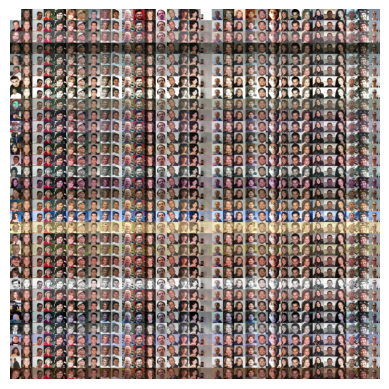

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

def show_image(image_path):
    """
    Load and display an image from the given path.

    :param image_path: Path to the image.
    """
    # Load the image
    img = Image.open(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Image path
image_path = '050000_reference.jpg'

# Show the image
show_image(image_path)

# 9 Conclusions

In conclusion, the project offers a powerful and versatile framework for facial expression manipulation and style transfer, leveraging advanced neural network architectures and specialized loss functions. The ability to process and transform images, as demonstrated through the handling of the Genki4k dataset and the generation of videos, showcases the practical applications of this technology in areas such as digital media, entertainment, and augmented reality.

The Python scripts provided for displaying images and generating videos highlight the accessibility of such advanced AI models for developers and researchers. With the right set of tools and libraries like PIL and OpenCV, one can easily integrate these models into broader applications, enabling creative and innovative uses of AI in image processing.

As AI continues to evolve, projects like StarGAN v2 not only push the boundaries of what's possible in computer vision but also open up new avenues for artistic and expressive digital content creation, making technology more interactive and engaging for users.





